## RQ2A: Feedback robustness on Decoy FashionMNIST CNN
Showcase for our research question 2 (A):
**How robust are XIL methods to uncertain, incomplete and adversarial feedback?**

Details about the cases:  
* Uncertain feedback: Random masks: $A \in \text{randint}(\{0,1\})$
* Incomplete feedback: Subregion $S$ of the (un)important parts in the mask $A = 
    \begin{cases} 1, & \text{if}\ a_i \in S \\ 0, & \text{otherwise} \end{cases}$.  
    In our case we chose the bottom half of a square as $S$
* Adversarial feedback: All-one binary masks $A \in \{1\}$  
  
see examples masks below 

In [1]:
# SETUP STUFF
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the xil program 
FOLDERNAME = "Masterthesis/XIL_experiments/xil_framework"
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/MyDrive/{}'.format(FOLDERNAME))

Mounted at /content/drive


In [ ]:
pip install captum

In [ ]:
pip install lime

In [4]:
cd /content/drive/MyDrive/Masterthesis/XIL_experiments/xil_framework/

/content/drive/MyDrive/Masterthesis/XIL_experiments/xil_framework


### Setup notebook

In [5]:
import logging

import torch
from torch import nn
from torch.nn import functional as F
import numpy as np

from learner.models import dnns
from learner.learner import Learner
from data_store.datasets import decoy_mnist, decoy_mnist_CE_augmented
from xil_methods.xil_loss import RRRLoss, RRRGradCamLoss, CDEPLoss, HINTLoss, RBRLoss
import util

In [6]:
# matplot magic
%matplotlib inline
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [7]:
# Hyperparameters
EPOCHS = 100
BATCH_SIZE = 256
LR = 0.001
SAVE_LAST = True
VERBOSE_AFTER_N_EPOCHS = 2
SEED = 10

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"[Using {DEVICE} device]")


[Using cpu device]


## Example masks for XIL Loss function:

[Using Seed= 10]
Loading dataset from existing file!
Random masks...


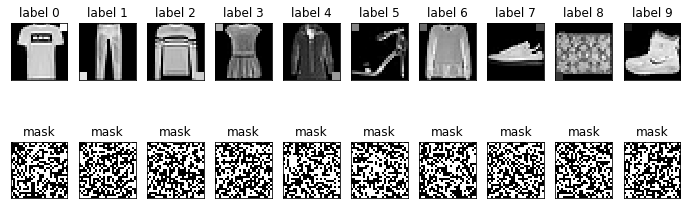

In [ ]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='random')
# show image and explanation
print("Random masks...")
util.show_img_expl_grid_mnist(train_dataloader)

Other options to test for random/uncertain feedback: Randomize only specific amount of the original image size in the mask, or mark other area than the correct square, etc?  

[Using Seed= 10]
Loading dataset from existing file!
Incomplete masks...


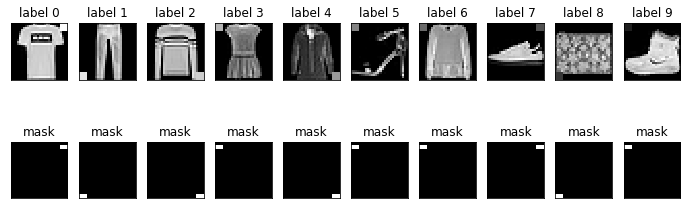

In [ ]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='incomplete')
# show image and explanation
print("Incomplete masks...")
util.show_img_expl_grid_mnist(train_dataloader)

[Using Seed= 10]
Loading dataset from existing file!
Adversarial masks...


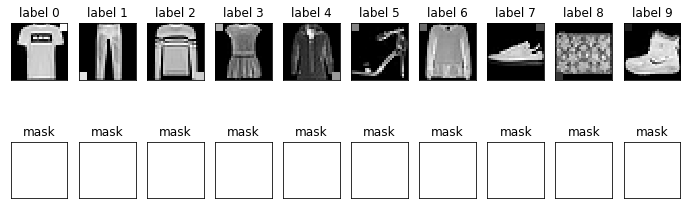

In [ ]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='adversarial')
# show image and explanation
print("Adversarial masks...")
util.show_img_expl_grid_mnist(train_dataloader)

## RRR: Feedback Robustness

### Random

[Using Seed= 10]
Loading dataset from existing file!
RRR-Random
Start training...
Epoch 2| accuracy: 73.8%, loss: 0.005234 | Test Error: Acc: 73.3%, Avg loss: 0.008081
Epoch 4| accuracy: 78.2%, loss: 0.004545 | Test Error: Acc: 78.0%, Avg loss: 0.007889
Epoch 6| accuracy: 80.4%, loss: 0.004212 | Test Error: Acc: 78.5%, Avg loss: 0.007721
Epoch 8| accuracy: 83.0%, loss: 0.003985 | Test Error: Acc: 77.7%, Avg loss: 0.007686
Epoch 10| accuracy: 85.0%, loss: 0.003617 | Test Error: Acc: 77.5%, Avg loss: 0.007628
Epoch 12| accuracy: 85.9%, loss: 0.003489 | Test Error: Acc: 77.4%, Avg loss: 0.007596
Epoch 14| accuracy: 86.5%, loss: 0.003398 | Test Error: Acc: 77.0%, Avg loss: 0.007564
Epoch 16| accuracy: 86.9%, loss: 0.003331 | Test Error: Acc: 75.6%, Avg loss: 0.007546
Epoch 18| accuracy: 86.6%, loss: 0.003385 | Test Error: Acc: 76.2%, Avg loss: 0.007588
Epoch 20| accuracy: 87.4%, loss: 0.003279 | Test Error: Acc: 76.8%, Avg loss: 0.007575
Epoch 22| accuracy: 87.8%, loss: 0.003250 | Test Err

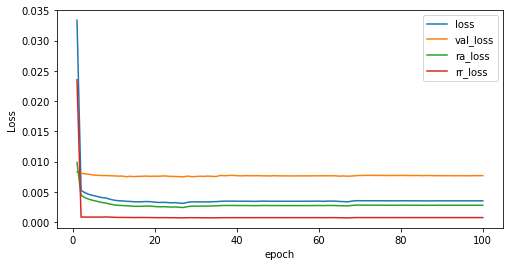

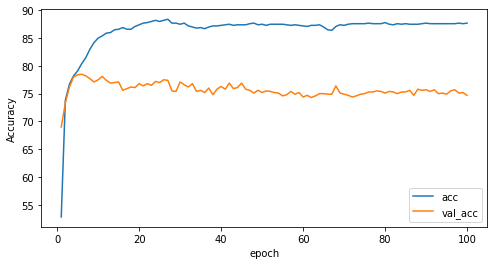

In [ ]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='random')
# ########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = RRRLoss(10)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print("RRR-Random")
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Random-DecoyFMNIST-CNN-RRR--reg=10--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


### Incomplete

[Using Seed= 10]
Loading dataset from existing file!
RRR-Incomplete
Start training...
Epoch 2| accuracy: 88.0%, loss: 0.001412 | Test Error: Acc: 85.9%, Avg loss: 0.006565
Epoch 4| accuracy: 91.7%, loss: 0.001026 | Test Error: Acc: 84.9%, Avg loss: 0.006569
Epoch 6| accuracy: 93.3%, loss: 0.000840 | Test Error: Acc: 84.4%, Avg loss: 0.006575
Epoch 8| accuracy: 94.6%, loss: 0.000699 | Test Error: Acc: 83.1%, Avg loss: 0.006579
Epoch 10| accuracy: 95.3%, loss: 0.000610 | Test Error: Acc: 82.2%, Avg loss: 0.006604
Epoch 12| accuracy: 95.8%, loss: 0.000549 | Test Error: Acc: 81.9%, Avg loss: 0.006623
Epoch 14| accuracy: 96.5%, loss: 0.000468 | Test Error: Acc: 81.7%, Avg loss: 0.006604
Epoch 16| accuracy: 96.9%, loss: 0.000427 | Test Error: Acc: 80.1%, Avg loss: 0.006656
Epoch 18| accuracy: 97.3%, loss: 0.000391 | Test Error: Acc: 80.8%, Avg loss: 0.006633
Epoch 20| accuracy: 97.6%, loss: 0.000356 | Test Error: Acc: 80.1%, Avg loss: 0.006647
Epoch 22| accuracy: 97.6%, loss: 0.000362 | Test

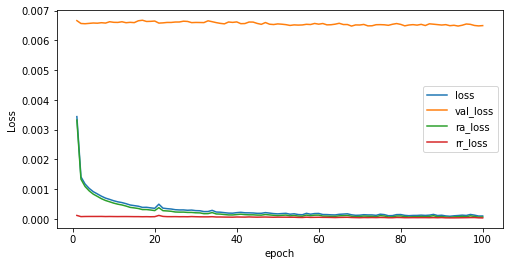

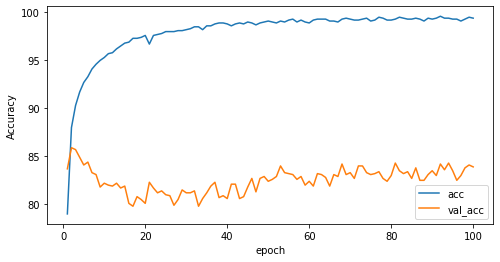

In [ ]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='incomplete')
# ########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = RRRLoss(10)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print('RRR-Incomplete')
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Incomplete-DecoyFMNIST-CNN-RRR--reg=10--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


### Adversarial

[Using Seed= 10]
Loading dataset from existing file!
RRR-Adversarial
Start training...
Epoch 2| accuracy: 70.3%, loss: 0.006117 | Test Error: Acc: 72.8%, Avg loss: 0.008403
Epoch 4| accuracy: 76.5%, loss: 0.005441 | Test Error: Acc: 75.3%, Avg loss: 0.008154
Epoch 6| accuracy: 79.0%, loss: 0.004911 | Test Error: Acc: 76.9%, Avg loss: 0.008024
Epoch 8| accuracy: 80.7%, loss: 0.004617 | Test Error: Acc: 78.4%, Avg loss: 0.007983
Epoch 10| accuracy: 82.6%, loss: 0.004330 | Test Error: Acc: 77.1%, Avg loss: 0.007857
Epoch 12| accuracy: 83.9%, loss: 0.004189 | Test Error: Acc: 76.7%, Avg loss: 0.007780
Epoch 14| accuracy: 84.3%, loss: 0.004092 | Test Error: Acc: 77.2%, Avg loss: 0.007800
Epoch 16| accuracy: 85.1%, loss: 0.003923 | Test Error: Acc: 78.4%, Avg loss: 0.007723
Epoch 18| accuracy: 85.7%, loss: 0.003862 | Test Error: Acc: 78.1%, Avg loss: 0.007715
Epoch 20| accuracy: 85.4%, loss: 0.003863 | Test Error: Acc: 77.5%, Avg loss: 0.007787
Epoch 22| accuracy: 85.9%, loss: 0.003834 | Tes

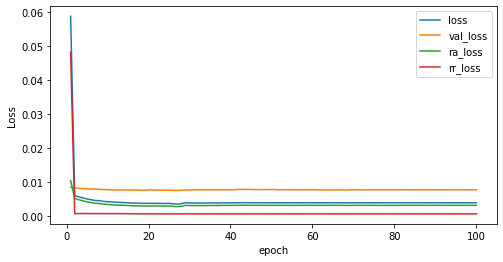

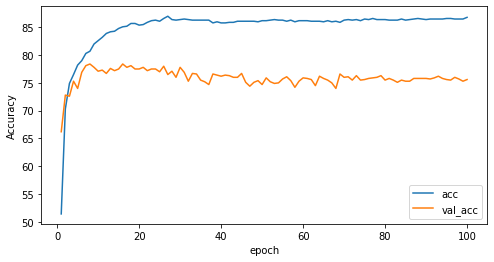

In [ ]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='adversarial')
# ########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = RRRLoss(10)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print('RRR-Adversarial')
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Adversarial-DecoyFMNIST-CNN-RRR--reg=10--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


## RRRGradCam: Feedback Robustness

### Random

[Using Seed= 10]
Loading dataset from existing file!
RRRGradCam-Random
Start training...
Epoch 2| accuracy: 53.7%, loss: 0.673821 | Test Error: Acc: 54.6%, Avg loss: 0.007855
Epoch 4| accuracy: 35.1%, loss: 0.604128 | Test Error: Acc: 37.6%, Avg loss: 0.008390
Epoch 6| accuracy: 46.8%, loss: 1.793903 | Test Error: Acc: 40.9%, Avg loss: 0.008434
Epoch 8| accuracy: 23.6%, loss: 0.024281 | Test Error: Acc: 22.4%, Avg loss: 0.008810
Epoch 10| accuracy: 25.5%, loss: 0.031532 | Test Error: Acc: 24.8%, Avg loss: 0.008783
Epoch 12| accuracy: 19.7%, loss: 0.083073 | Test Error: Acc: 19.1%, Avg loss: 0.009030
Epoch 14| accuracy: 20.5%, loss: 0.033254 | Test Error: Acc: 21.3%, Avg loss: 0.008949
Epoch 16| accuracy: 10.0%, loss: 0.031813 | Test Error: Acc: 10.0%, Avg loss: 0.009211
Epoch 18| accuracy: 9.9%, loss: 0.009041 | Test Error: Acc: 10.0%, Avg loss: 0.009211
Epoch 20| accuracy: 9.9%, loss: 0.009021 | Test Error: Acc: 10.0%, Avg loss: 0.009210
Epoch 22| accuracy: 9.8%, loss: 0.009019 | Test

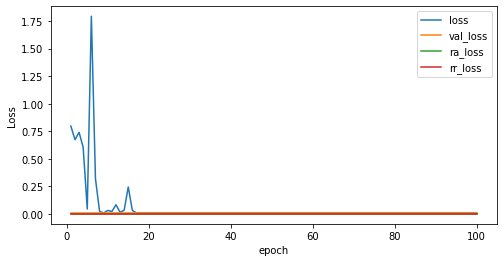

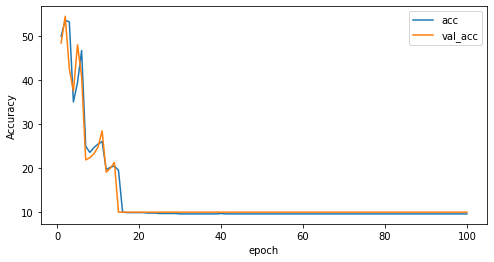

In [ ]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='random')
# ########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = RRRGradCamLoss(1)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print("RRRGradCam-Random")
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Random-DecoyFMNIST-CNN-RRRGradCam--reg=1--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


### Incomplete

[Using Seed= 10]
Loading dataset from existing file!
RRRGradCam-Random
Start training...
Epoch 2| accuracy: 82.9%, loss: 0.002445 | Test Error: Acc: 80.2%, Avg loss: 0.006802
Epoch 4| accuracy: 87.7%, loss: 0.001758 | Test Error: Acc: 78.5%, Avg loss: 0.006843
Epoch 6| accuracy: 90.8%, loss: 0.001574 | Test Error: Acc: 81.6%, Avg loss: 0.006657
Epoch 8| accuracy: 92.7%, loss: 0.001334 | Test Error: Acc: 77.7%, Avg loss: 0.006776
Epoch 10| accuracy: 90.0%, loss: 0.002324 | Test Error: Acc: 74.8%, Avg loss: 0.006919
Epoch 12| accuracy: 92.1%, loss: 0.001591 | Test Error: Acc: 72.6%, Avg loss: 0.006980
Epoch 14| accuracy: 94.2%, loss: 0.000885 | Test Error: Acc: 72.4%, Avg loss: 0.006974
Epoch 16| accuracy: 96.1%, loss: 0.000648 | Test Error: Acc: 69.8%, Avg loss: 0.007066
Epoch 18| accuracy: 96.2%, loss: 0.000792 | Test Error: Acc: 68.3%, Avg loss: 0.007108
Epoch 20| accuracy: 96.5%, loss: 0.000684 | Test Error: Acc: 68.1%, Avg loss: 0.007112
Epoch 22| accuracy: 96.9%, loss: 0.000669 | T

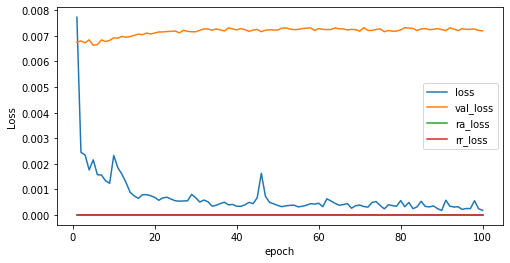

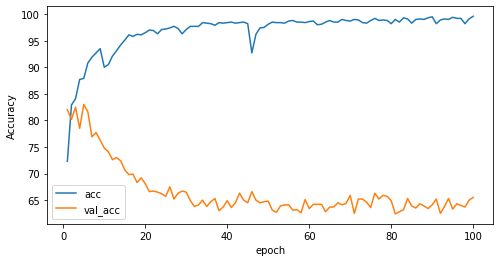

In [ ]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='incomplete')
# ########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = RRRGradCamLoss(1)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print("RRRGradCam-Random")
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Incomplete-DecoyFMNIST-CNN-RRRGradCam--reg=1--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


### Adversarial

[Using Seed= 10]
Loading dataset from existing file!
RRRGradCam-Random
Start training...
Epoch 2| accuracy: 49.2%, loss: 2.976846 | Test Error: Acc: 50.7%, Avg loss: 0.007985
Epoch 4| accuracy: 62.6%, loss: 4.903901 | Test Error: Acc: 66.9%, Avg loss: 0.007535
Epoch 6| accuracy: 71.4%, loss: 2.612731 | Test Error: Acc: 69.9%, Avg loss: 0.007295
Epoch 8| accuracy: 75.1%, loss: 2.394857 | Test Error: Acc: 74.6%, Avg loss: 0.007122
Epoch 10| accuracy: 78.1%, loss: 1.785348 | Test Error: Acc: 75.3%, Avg loss: 0.007229
Epoch 12| accuracy: 76.9%, loss: 1.675334 | Test Error: Acc: 76.4%, Avg loss: 0.007144
Epoch 14| accuracy: 77.1%, loss: 1.423829 | Test Error: Acc: 73.4%, Avg loss: 0.007247
Epoch 16| accuracy: 76.7%, loss: 1.283318 | Test Error: Acc: 72.2%, Avg loss: 0.007260
Epoch 18| accuracy: 76.1%, loss: 1.469248 | Test Error: Acc: 72.1%, Avg loss: 0.007205
Epoch 20| accuracy: 76.0%, loss: 1.425655 | Test Error: Acc: 72.5%, Avg loss: 0.007251
Epoch 22| accuracy: 76.2%, loss: 1.393159 | T

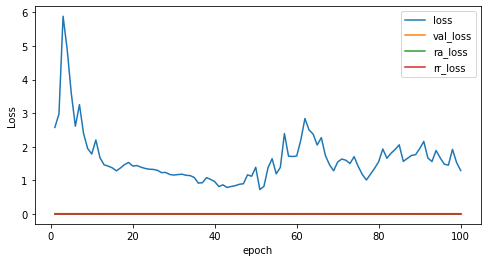

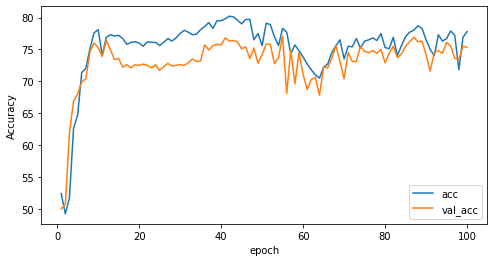

In [ ]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='adversarial')
# ########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = RRRGradCamLoss(1)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print("RRRGradCam-Random")
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Adversarial-DecoyFMNIST-CNN-RRRGradCam--reg=1--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


## RBR: Feedback Robustness

### Random 

[Using Seed= 10]
Loading dataset from existing file!
RBR-Random
Start training...
Epoch 2| accuracy: 91.2%, loss: 0.001041 | Test Error: Acc: 75.2%, Avg loss: 0.006899
Epoch 4| accuracy: 94.6%, loss: 0.000665 | Test Error: Acc: 72.0%, Avg loss: 0.006995
Epoch 6| accuracy: 96.2%, loss: 0.000483 | Test Error: Acc: 70.1%, Avg loss: 0.007056
Epoch 8| accuracy: 96.9%, loss: 0.000405 | Test Error: Acc: 67.5%, Avg loss: 0.007147
Epoch 10| accuracy: 97.4%, loss: 0.000351 | Test Error: Acc: 67.1%, Avg loss: 0.007162
Epoch 12| accuracy: 97.5%, loss: 0.000336 | Test Error: Acc: 67.5%, Avg loss: 0.007151
Epoch 14| accuracy: 98.2%, loss: 0.000259 | Test Error: Acc: 67.7%, Avg loss: 0.007140
Epoch 16| accuracy: 98.0%, loss: 0.000286 | Test Error: Acc: 67.0%, Avg loss: 0.007152
Epoch 18| accuracy: 98.3%, loss: 0.000249 | Test Error: Acc: 66.7%, Avg loss: 0.007168
Epoch 20| accuracy: 86.0%, loss: 0.001860 | Test Error: Acc: 78.1%, Avg loss: 0.006816
Epoch 22| accuracy: 93.8%, loss: 0.000760 | Test Err

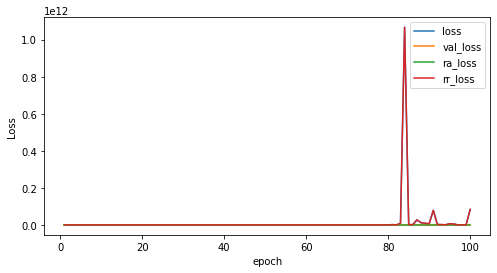

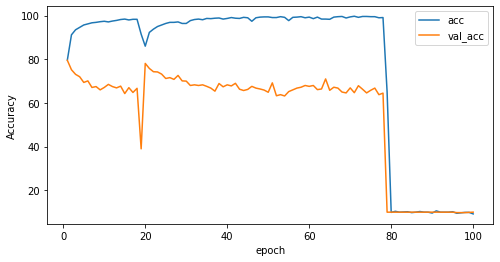

In [ ]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='random')
# ########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = RBRLoss(1000)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print("RBR-Random")
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Random-DecoyFMNIST-CNN-RBR--reg=1k--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


### Incomplete

[Using Seed= 10]
Loading dataset from existing file!
RBR-Incomplete
Start training...
Epoch 2| accuracy: 88.8%, loss: 0.001312 | Test Error: Acc: 62.8%, Avg loss: 0.007379
Epoch 4| accuracy: 91.7%, loss: 0.000965 | Test Error: Acc: 59.8%, Avg loss: 0.007469
Epoch 6| accuracy: 92.9%, loss: 0.000824 | Test Error: Acc: 59.2%, Avg loss: 0.007481
Epoch 8| accuracy: 93.8%, loss: 0.000722 | Test Error: Acc: 58.5%, Avg loss: 0.007509
Epoch 10| accuracy: 94.3%, loss: 0.000658 | Test Error: Acc: 58.0%, Avg loss: 0.007510
Epoch 12| accuracy: 94.6%, loss: 0.000617 | Test Error: Acc: 57.1%, Avg loss: 0.007554
Epoch 14| accuracy: 95.1%, loss: 0.000572 | Test Error: Acc: 55.8%, Avg loss: 0.007590
Epoch 16| accuracy: 95.4%, loss: 0.000531 | Test Error: Acc: 55.4%, Avg loss: 0.007622
Epoch 18| accuracy: 95.4%, loss: 0.000525 | Test Error: Acc: 55.8%, Avg loss: 0.007592
Epoch 20| accuracy: 95.6%, loss: 0.000504 | Test Error: Acc: 54.0%, Avg loss: 0.007662
Epoch 22| accuracy: 95.8%, loss: 0.000471 | Test

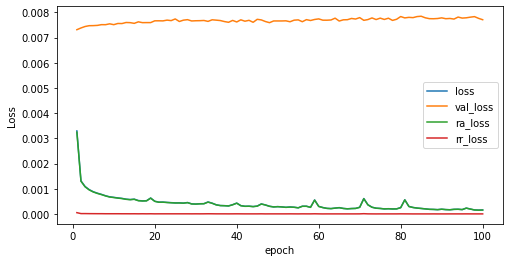

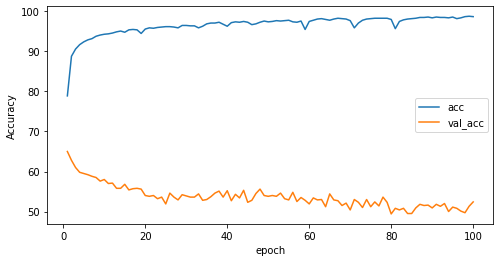

In [ ]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='incomplete')
# ########### initalize model, loss and optimizer
model = dnns.SimpleMlp().to(DEVICE)
loss_fn = RBRLoss(1000)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print('RBR-Incomplete')
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Incomplete-DecoyFMNIST-CNN-RRR--reg=1k--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


### Adversarial

[Using Seed= 10]
Loading dataset from existing file!
RBR-Adversarial
Start training...
Epoch 2| accuracy: 91.9%, loss: 0.000984 | Test Error: Acc: 74.7%, Avg loss: 0.006915
Epoch 4| accuracy: 94.9%, loss: 0.000645 | Test Error: Acc: 70.6%, Avg loss: 0.007030
Epoch 6| accuracy: 96.4%, loss: 0.000481 | Test Error: Acc: 69.4%, Avg loss: 0.007065
Epoch 8| accuracy: 96.2%, loss: 0.000501 | Test Error: Acc: 67.7%, Avg loss: 0.007145
Epoch 10| accuracy: 97.6%, loss: 0.000341 | Test Error: Acc: 66.0%, Avg loss: 0.007197
Epoch 12| accuracy: 98.0%, loss: 0.000297 | Test Error: Acc: 66.4%, Avg loss: 0.007193
Epoch 14| accuracy: 97.9%, loss: 0.000296 | Test Error: Acc: 65.9%, Avg loss: 0.007201
Epoch 16| accuracy: 98.2%, loss: 0.000272 | Test Error: Acc: 65.3%, Avg loss: 0.007223
Epoch 18| accuracy: 98.7%, loss: 0.000215 | Test Error: Acc: 66.2%, Avg loss: 0.007190
Epoch 20| accuracy: 98.5%, loss: 0.000238 | Test Error: Acc: 63.0%, Avg loss: 0.007311
Epoch 22| accuracy: 98.3%, loss: 0.000264 | Tes

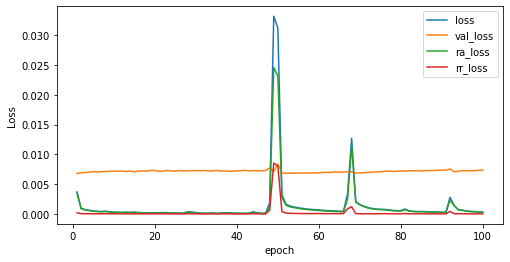

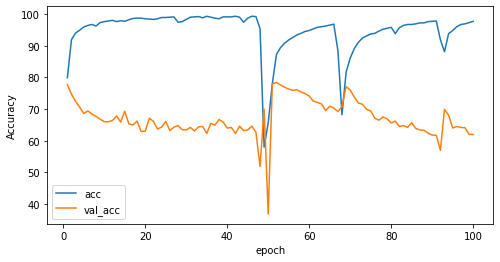

In [ ]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='adversarial')
# ########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = RBRLoss(1000)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print('RBR-Adversarial')
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Adversarial-DecoyFMNIST-CNN-RBR--reg=1k--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


## CDEP Feedback Robustness

### Random

[Using Seed= 10]
Loading dataset from existing file!
CDEP-Random
Start training...
Epoch 2| accuracy: 82.8%, loss: 0.002213 | Test Error: Acc: 81.2%, Avg loss: 0.006768
Epoch 4| accuracy: 88.9%, loss: 0.001458 | Test Error: Acc: 81.0%, Avg loss: 0.006727
Epoch 6| accuracy: 91.7%, loss: 0.001101 | Test Error: Acc: 76.9%, Avg loss: 0.006850
Epoch 8| accuracy: 93.5%, loss: 0.000868 | Test Error: Acc: 65.8%, Avg loss: 0.007229
Epoch 10| accuracy: 94.8%, loss: 0.000603 | Test Error: Acc: 67.7%, Avg loss: 0.007157
Epoch 12| accuracy: 96.1%, loss: 0.000468 | Test Error: Acc: 65.3%, Avg loss: 0.007236
Epoch 14| accuracy: 96.8%, loss: 0.000382 | Test Error: Acc: 62.9%, Avg loss: 0.007319
Epoch 16| accuracy: 96.3%, loss: 0.000431 | Test Error: Acc: 61.4%, Avg loss: 0.007381
Epoch 18| accuracy: 97.4%, loss: 0.000306 | Test Error: Acc: 59.4%, Avg loss: 0.007435
Epoch 20| accuracy: 97.9%, loss: 0.000240 | Test Error: Acc: 55.7%, Avg loss: 0.007577
Epoch 22| accuracy: 98.0%, loss: 0.000220 | Test Er

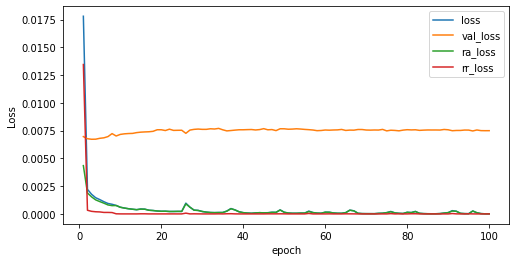

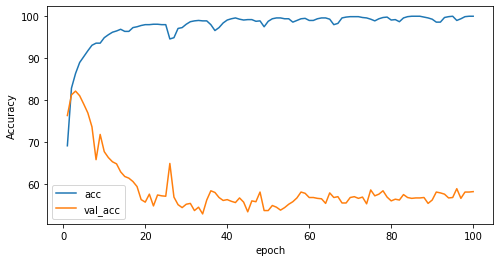

In [ ]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='random')
# ########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = CDEPLoss(1000)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print("CDEP-Random")
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Random-DecoyFMNIST-CNN-CDEP--reg=1k--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


### Incomplete

[Using Seed= 10]
Loading dataset from existing file!
CDEP-Incomplete
Start training...
Epoch 2| accuracy: 83.4%, loss: 0.001834 | Test Error: Acc: 81.2%, Avg loss: 0.006737
Epoch 4| accuracy: 89.1%, loss: 0.001261 | Test Error: Acc: 80.4%, Avg loss: 0.006723
Epoch 6| accuracy: 91.9%, loss: 0.000939 | Test Error: Acc: 77.8%, Avg loss: 0.006801
Epoch 8| accuracy: 93.5%, loss: 0.000755 | Test Error: Acc: 74.9%, Avg loss: 0.006889
Epoch 10| accuracy: 94.6%, loss: 0.000625 | Test Error: Acc: 71.5%, Avg loss: 0.007003
Epoch 12| accuracy: 95.6%, loss: 0.000510 | Test Error: Acc: 69.0%, Avg loss: 0.007084
Epoch 14| accuracy: 96.3%, loss: 0.000427 | Test Error: Acc: 67.9%, Avg loss: 0.007120
Epoch 16| accuracy: 96.8%, loss: 0.000370 | Test Error: Acc: 65.5%, Avg loss: 0.007201
Epoch 18| accuracy: 97.2%, loss: 0.000320 | Test Error: Acc: 64.2%, Avg loss: 0.007252
Epoch 20| accuracy: 97.3%, loss: 0.000305 | Test Error: Acc: 63.2%, Avg loss: 0.007287
Epoch 22| accuracy: 97.1%, loss: 0.000318 | Tes

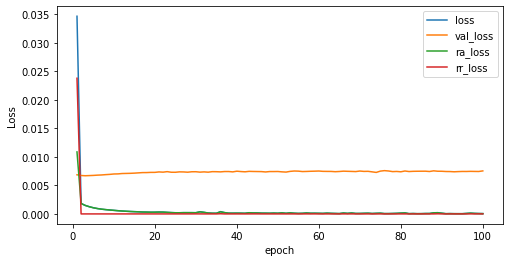

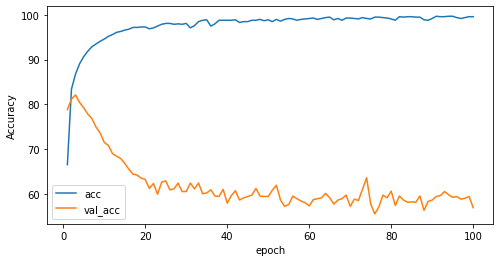

In [ ]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='incomplete')
# ########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = CDEPLoss(1000)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print('CDEP-Incomplete')
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Incomplete-DecoyFMNIST-CNN-CDEP--reg=1k--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


### Adversarial

[Using Seed= 10]
Loading dataset from existing file!
RBR-Adversarial
Start training...
Epoch 2| accuracy: 83.4%, loss: 0.001836 | Test Error: Acc: 82.1%, Avg loss: 0.006711
Epoch 4| accuracy: 90.1%, loss: 0.001140 | Test Error: Acc: 78.5%, Avg loss: 0.006772
Epoch 6| accuracy: 93.1%, loss: 0.000803 | Test Error: Acc: 74.2%, Avg loss: 0.006917
Epoch 8| accuracy: 94.7%, loss: 0.000615 | Test Error: Acc: 69.7%, Avg loss: 0.007063
Epoch 10| accuracy: 95.9%, loss: 0.000485 | Test Error: Acc: 67.3%, Avg loss: 0.007147
Epoch 12| accuracy: 96.6%, loss: 0.000404 | Test Error: Acc: 64.6%, Avg loss: 0.007243
Epoch 14| accuracy: 96.8%, loss: 0.000369 | Test Error: Acc: 62.7%, Avg loss: 0.007311
Epoch 16| accuracy: 96.9%, loss: 0.000357 | Test Error: Acc: 62.2%, Avg loss: 0.007333
Epoch 18| accuracy: 97.3%, loss: 0.000312 | Test Error: Acc: 61.6%, Avg loss: 0.007364
Epoch 20| accuracy: 97.4%, loss: 0.000293 | Test Error: Acc: 59.6%, Avg loss: 0.007436
Epoch 22| accuracy: 97.7%, loss: 0.000254 | Tes

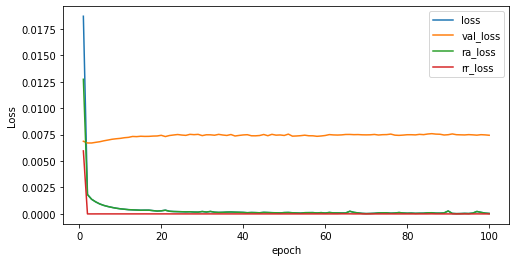

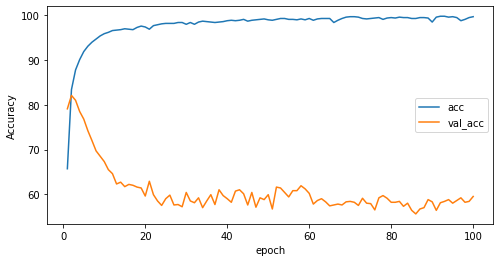

In [ ]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='adversarial')
# ########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = CDEPLoss(1000)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print('RBR-Adversarial')
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Adversarial-DecoyFMNIST-CNN-CDEP--reg=1k--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


## HINT Feedback Robustness  
Different from the other feedback masks, hint requires feeback that masks the important regions in the images. Therefore the incomplete feeback changes to the following masks (again cutting of the top half of the ground-truth feedback masks)... 

[Using Seed= 10]
Loading dataset from existing file!
Incomplete masks...


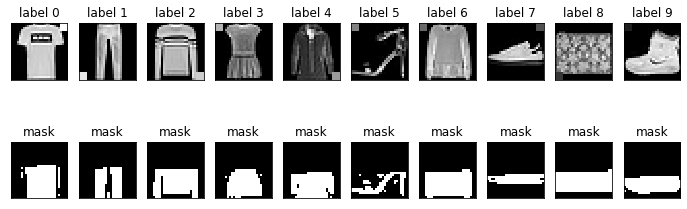

In [ ]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, hint_expl=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='incomplete')
# show image and explanation
print("Incomplete masks...")
util.show_img_expl_grid_mnist(train_dataloader)

### Random

[Using Seed= 10]
Loading dataset from existing file!
HINT-Random
Start training...
Epoch 2| accuracy: 81.0%, loss: 0.056811 | Test Error: Acc: 68.5%, Avg loss: 0.007119
Epoch 4| accuracy: 85.4%, loss: 0.054598 | Test Error: Acc: 80.2%, Avg loss: 0.006763
Epoch 6| accuracy: 87.1%, loss: 0.054318 | Test Error: Acc: 75.7%, Avg loss: 0.006899
Epoch 8| accuracy: 88.2%, loss: 0.054749 | Test Error: Acc: 75.2%, Avg loss: 0.006935
Epoch 10| accuracy: 87.0%, loss: 0.056731 | Test Error: Acc: 73.4%, Avg loss: 0.006973
Epoch 12| accuracy: 87.3%, loss: 0.058383 | Test Error: Acc: 73.4%, Avg loss: 0.006984
Epoch 14| accuracy: 87.9%, loss: 0.055541 | Test Error: Acc: 71.7%, Avg loss: 0.007040
Epoch 16| accuracy: 89.9%, loss: 0.053818 | Test Error: Acc: 72.2%, Avg loss: 0.007026
Epoch 18| accuracy: 90.1%, loss: 0.053603 | Test Error: Acc: 70.6%, Avg loss: 0.007058
Epoch 20| accuracy: 90.5%, loss: 0.053891 | Test Error: Acc: 71.0%, Avg loss: 0.007043
Epoch 22| accuracy: 88.8%, loss: 0.055748 | Test Er

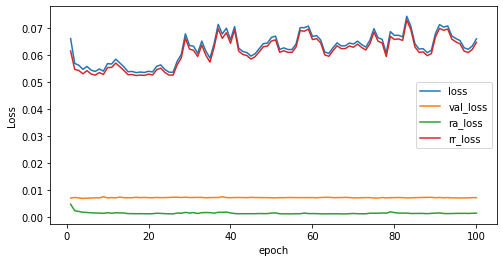

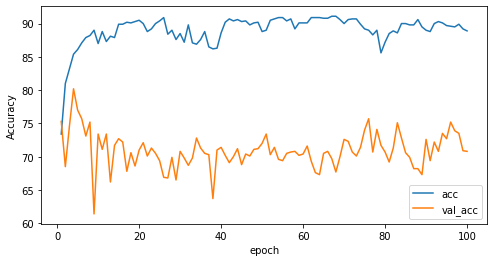

In [ ]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, hint_expl=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='random')
# ########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = HINTLoss(100)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print('HINT-Random')
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Random-DecoyFMNIST-CNN-HINT--reg=100--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


### Incomplete

[Using Seed= 10]
Loading dataset from existing file!
HINT-Incomplete
Start training...
Epoch 2| accuracy: 83.7%, loss: 0.036789 | Test Error: Acc: 82.3%, Avg loss: 0.006655
Epoch 4| accuracy: 88.5%, loss: 0.032385 | Test Error: Acc: 80.9%, Avg loss: 0.006703
Epoch 6| accuracy: 89.7%, loss: 0.032305 | Test Error: Acc: 77.5%, Avg loss: 0.006799
Epoch 8| accuracy: 89.8%, loss: 0.032987 | Test Error: Acc: 77.9%, Avg loss: 0.006823
Epoch 10| accuracy: 90.4%, loss: 0.031661 | Test Error: Acc: 76.8%, Avg loss: 0.006841
Epoch 12| accuracy: 89.8%, loss: 0.033709 | Test Error: Acc: 75.1%, Avg loss: 0.006880
Epoch 14| accuracy: 90.1%, loss: 0.034258 | Test Error: Acc: 77.8%, Avg loss: 0.006793
Epoch 16| accuracy: 91.0%, loss: 0.032941 | Test Error: Acc: 75.8%, Avg loss: 0.006861
Epoch 18| accuracy: 91.0%, loss: 0.032062 | Test Error: Acc: 71.7%, Avg loss: 0.007012
Epoch 20| accuracy: 91.2%, loss: 0.030280 | Test Error: Acc: 77.5%, Avg loss: 0.006812
Epoch 22| accuracy: 91.6%, loss: 0.030440 | Tes

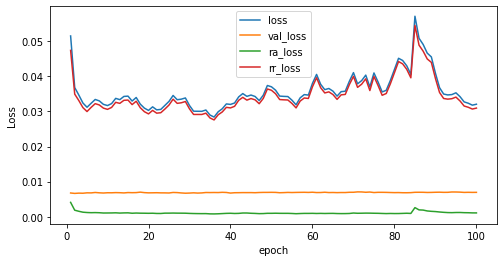

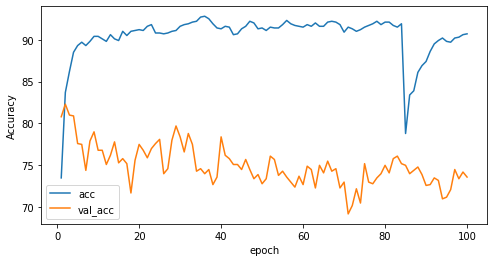

In [ ]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, hint_expl=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='incomplete')
# ########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = HINTLoss(100)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print('HINT-Incomplete')
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Incomplete-DecoyFMNIST-CNN-HINT--reg=100--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


### Adversarial

[Using Seed= 10]
Loading dataset from existing file!
HINT-Adversarial
Start training...
Epoch 2| accuracy: 67.8%, loss: 0.071919 | Test Error: Acc: 70.1%, Avg loss: 0.007254
Epoch 4| accuracy: 69.8%, loss: 0.077373 | Test Error: Acc: 66.9%, Avg loss: 0.007304
Epoch 6| accuracy: 72.3%, loss: 0.081591 | Test Error: Acc: 71.8%, Avg loss: 0.007113
Epoch 8| accuracy: 75.6%, loss: 0.065054 | Test Error: Acc: 75.9%, Avg loss: 0.007023
Epoch 10| accuracy: 75.6%, loss: 0.071447 | Test Error: Acc: 75.8%, Avg loss: 0.007036
Epoch 12| accuracy: 75.5%, loss: 0.066017 | Test Error: Acc: 74.6%, Avg loss: 0.007089
Epoch 14| accuracy: 75.1%, loss: 0.059006 | Test Error: Acc: 73.3%, Avg loss: 0.007061
Epoch 16| accuracy: 75.4%, loss: 0.052578 | Test Error: Acc: 76.1%, Avg loss: 0.007012
Epoch 18| accuracy: 76.2%, loss: 0.059374 | Test Error: Acc: 75.9%, Avg loss: 0.006995
Epoch 20| accuracy: 76.1%, loss: 0.073427 | Test Error: Acc: 74.9%, Avg loss: 0.007020
Epoch 22| accuracy: 47.4%, loss: 0.146514 | Te

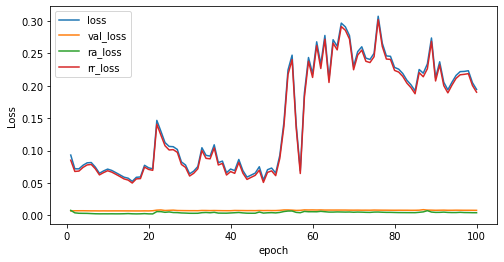

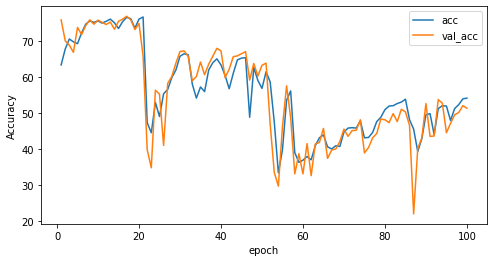

In [ ]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, hint_expl=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='adversarial')
# ########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = HINTLoss(100)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print('HINT-Adversarial')
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Adversarial-DecoyFMNIST-CNN-HINT--reg=100--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


## CE Feedback Robustness  
CE is an augmentation strategy which adds counterexamples. These counterexamples are generated based on the feedback mask (given by the user - we simulate these). The feedback masks for the different cases can be seen at the beginning of this notebook. We are using the ce_strategy 'random' (randomize pixels which are masked by the feedback)...for examples see other notebook DecoyMNIST FedbackRobustness CE section.

### Random

[Using Seed= 10]
Loading dataset from existing file!
Train set was augmented: X.size= 120000, y.size= 120000
CE-Random
Start training...
Epoch 2| accuracy: 82.5%, loss: 0.001830 | Test Error: Acc: 77.8%, Avg loss: 0.006822
Epoch 4| accuracy: 88.0%, loss: 0.001275 | Test Error: Acc: 71.3%, Avg loss: 0.007005
Epoch 6| accuracy: 89.9%, loss: 0.001060 | Test Error: Acc: 67.5%, Avg loss: 0.007159
Epoch 8| accuracy: 90.8%, loss: 0.000974 | Test Error: Acc: 69.7%, Avg loss: 0.007059
Epoch 10| accuracy: 91.7%, loss: 0.000873 | Test Error: Acc: 66.1%, Avg loss: 0.007203
Epoch 12| accuracy: 92.0%, loss: 0.000842 | Test Error: Acc: 66.7%, Avg loss: 0.007181
Epoch 14| accuracy: 92.3%, loss: 0.000815 | Test Error: Acc: 65.0%, Avg loss: 0.007239
Epoch 16| accuracy: 92.9%, loss: 0.000739 | Test Error: Acc: 64.3%, Avg loss: 0.007273
Epoch 18| accuracy: 93.4%, loss: 0.000683 | Test Error: Acc: 66.4%, Avg loss: 0.007183
Epoch 20| accuracy: 93.7%, loss: 0.000664 | Test Error: Acc: 66.9%, Avg loss: 0.0071

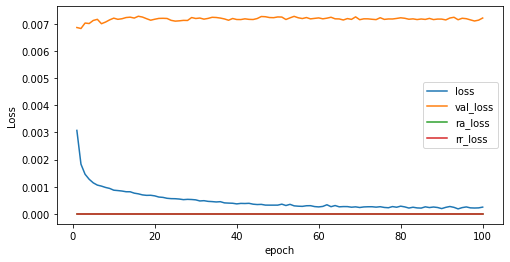

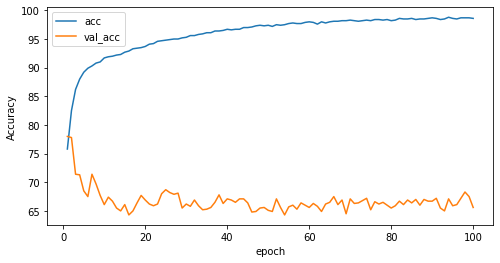

In [ ]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist_CE_augmented(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='random')
# ########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print("CE-Random")
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Random-DecoyFMNIST-CNN-CE--reg=60k--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


### Incomplete

[Using Seed= 10]
Loading dataset from existing file!
Train set was augmented: X.size= 120000, y.size= 120000
CE-Incomplete
Start training...
Epoch 2| accuracy: 93.5%, loss: 0.000732 | Test Error: Acc: 76.7%, Avg loss: 0.006810
Epoch 4| accuracy: 96.7%, loss: 0.000370 | Test Error: Acc: 71.0%, Avg loss: 0.006992
Epoch 6| accuracy: 97.6%, loss: 0.000262 | Test Error: Acc: 67.8%, Avg loss: 0.007115
Epoch 8| accuracy: 98.0%, loss: 0.000214 | Test Error: Acc: 67.4%, Avg loss: 0.007123
Epoch 10| accuracy: 98.4%, loss: 0.000179 | Test Error: Acc: 67.5%, Avg loss: 0.007134
Epoch 12| accuracy: 98.6%, loss: 0.000156 | Test Error: Acc: 65.2%, Avg loss: 0.007217
Epoch 14| accuracy: 98.8%, loss: 0.000136 | Test Error: Acc: 65.1%, Avg loss: 0.007216
Epoch 16| accuracy: 98.9%, loss: 0.000133 | Test Error: Acc: 66.5%, Avg loss: 0.007173
Epoch 18| accuracy: 99.0%, loss: 0.000114 | Test Error: Acc: 63.8%, Avg loss: 0.007271
Epoch 20| accuracy: 99.1%, loss: 0.000116 | Test Error: Acc: 64.8%, Avg loss: 0.

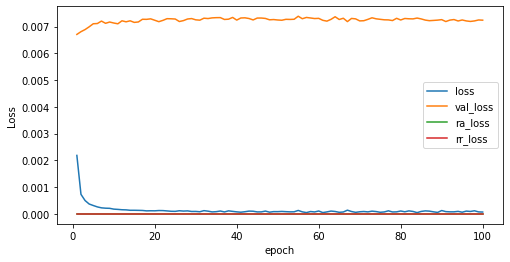

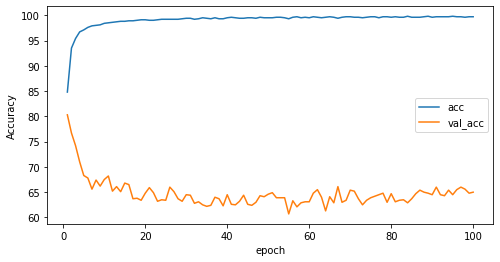

In [ ]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist_CE_augmented(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='incomplete')
# ########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print("CE-Incomplete")
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Incomplete-DecoyFMNIST-CNN-CE--reg=60k--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


### Adversarial

[Using Seed= 10]
Loading dataset from existing file!
Train set was augmented: X.size= 120000, y.size= 120000
CE-Adversarial
Start training...
Epoch 2| accuracy: 49.2%, loss: 0.005182 | Test Error: Acc: 51.8%, Avg loss: 0.008220
Epoch 4| accuracy: 51.0%, loss: 0.004963 | Test Error: Acc: 46.6%, Avg loss: 0.008263
Epoch 6| accuracy: 52.8%, loss: 0.004759 | Test Error: Acc: 57.2%, Avg loss: 0.007886
Epoch 8| accuracy: 53.3%, loss: 0.004694 | Test Error: Acc: 56.6%, Avg loss: 0.007626
Epoch 10| accuracy: 52.3%, loss: 0.004819 | Test Error: Acc: 60.4%, Avg loss: 0.007568
Epoch 12| accuracy: 53.9%, loss: 0.004629 | Test Error: Acc: 55.5%, Avg loss: 0.007764
Epoch 14| accuracy: 53.9%, loss: 0.004652 | Test Error: Acc: 46.9%, Avg loss: 0.008097
Epoch 16| accuracy: 54.2%, loss: 0.004621 | Test Error: Acc: 49.7%, Avg loss: 0.007859
Epoch 18| accuracy: 54.4%, loss: 0.004604 | Test Error: Acc: 52.7%, Avg loss: 0.007761
Epoch 20| accuracy: 54.5%, loss: 0.004587 | Test Error: Acc: 57.7%, Avg loss: 0

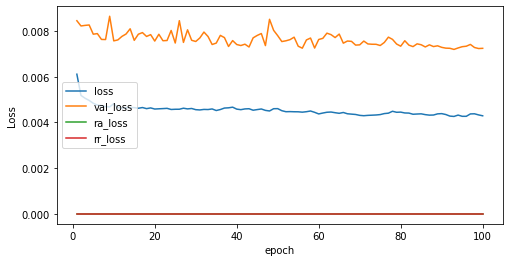

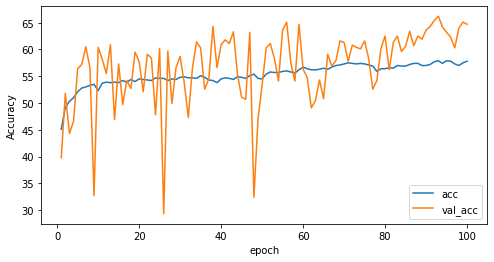

In [8]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist_CE_augmented(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE, feedback='adversarial')
# ########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print("CE-Adversarial")
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Adversarial-DecoyFMNIST-CNN-CE-1--reg=60k--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()
